In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns #for plotting
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats

from scipy.stats import spearmanr,pointbiserialr  # for Spearman Correlation and Biserial
from statsmodels.stats.stattools import durbin_watson
from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import anderson, norm, uniform
from skgof import cvm_test, ks_test
import statsmodels.stats.diagnostic as sm_diagnostic

from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\user\Miniconda3\lib\site-packages\skgof\ecdfgof.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from .cvmdist import cvm_unif


In [2]:
#Datasets regarding Spain

In [3]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\Spain.csv")
df = data.copy()

In [4]:
df.head()

,ccaa,fecha,casos,ia,uci,muertes,hospitalizados,curados,nuevos
0,Andalucía,2020-03-02,12.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Andalucía,2020-03-03,13.0,0.15,NaN,NaN,NaN,NaN,1.0
2,Andalucía,2020-03-04,13.0,0.15,1.0,NaN,NaN,NaN,0.0
3,Andalucía,2020-03-05,12.0,0.14,1.0,0.0,NaN,NaN,-1.0
4,Andalucía,2020-03-06,21.0,0.25,1.0,0.0,NaN,NaN,9.0


In [5]:
#Datasets regarding Greece

In [6]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\Greece.csv")
df = data.copy()

In [7]:
df.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
0,22-01-2020,NaN,Greece,0,0,0,0,39.0742,21.8243,4.17,...,1.075,0.0,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
1,23-01-2020,NaN,Greece,0,0,0,0,39.0742,21.8243,4.89,...,1.075,0.0,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
2,24-01-2020,NaN,Greece,0,0,0,0,39.0742,21.8243,4.22,...,1.075,0.0,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
3,25-01-2020,NaN,Greece,0,0,0,0,39.0742,21.8243,5.33,...,1.075,0.0,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
4,26-01-2020,NaN,Greece,0,0,0,0,39.0742,21.8243,8.06,...,1.075,0.0,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      69 non-null     object 
 1   State                     0 non-null      float64
 2   Country                   69 non-null     object 
 3   Cumulative_cases          69 non-null     int64  
 4   Cumulative_death          69 non-null     int64  
 5   Daily_cases               69 non-null     int64  
 6   Daily_death               69 non-null     int64  
 7   Latitude                  69 non-null     float64
 8   Longitude                 69 non-null     float64
 9   Temperature               69 non-null     float64
 10  Min_temperature           69 non-null     float64
 11  Max_temperature           69 non-null     float64
 12  Wind_speed                69 non-null     float64
 13  Precipitation             69 non-null     float64
 14  Fog_Presence

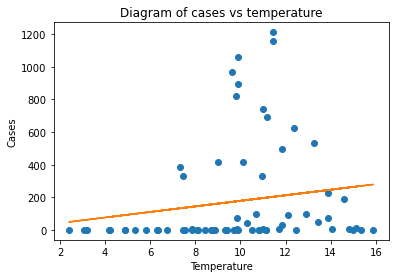

In [9]:
xi = df.Temperature
y = df.Cumulative_cases
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

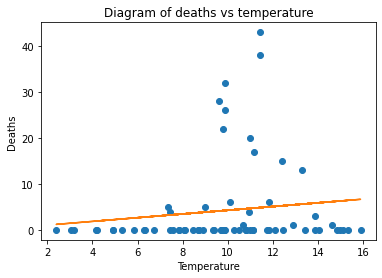

In [10]:
xi = df.Temperature
y = df.Cumulative_death
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Deaths")
plt.title('Diagram of deaths vs temperature')
ax = plt.gca()
fig = plt.gcf()

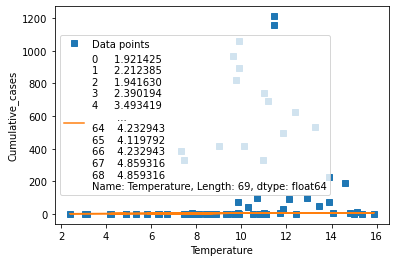

In [11]:
fig, ax = plt.subplots()
ax.plot(df.Temperature,df.Cumulative_cases , linewidth=0, marker='s', label='Data points')
ax.plot(df.Temperature, intercept + slope * df.Temperature, label=line)
ax.set_xlabel('Temperature')
ax.set_ylabel('Cumulative_cases')
ax.legend(facecolor='white')
plt.show()

In [12]:
df.corr()

,State,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Min_temperature,Max_temperature,...,Age%_65+,Hospital Beds/1000,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.)
State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cumulative_cases,NaN,1.000000e+00,9.692872e-01,8.311126e-01,8.409233e-01,4.650961e-16,-4.650961e-16,1.672251e-01,2.905368e-01,-2.634454e-02,...,4.547607e-16,4.842906e-16,4.842906e-16,1.000000e+00,-4.842906e-16,4.650961e-16,-4.842906e-16,3.803453e-16,NaN,NaN
Cumulative_death,NaN,9.692872e-01,1.000000e+00,7.434152e-01,8.608970e-01,-4.960873e-16,4.960873e-16,1.324218e-01,2.663542e-01,-6.227618e-02,...,-2.300695e-16,2.958036e-16,2.958036e-16,9.692872e-01,-2.958036e-16,-4.960873e-16,-2.958036e-16,6.902085e-16,NaN,NaN
Daily_cases,NaN,8.311126e-01,7.434152e-01,1.000000e+00,6.477795e-01,5.192270e-16,-5.192270e-16,2.514232e-01,3.216951e-01,8.350029e-02,...,-3.461513e-16,-4.792865e-16,-4.792865e-16,8.311126e-01,4.792865e-16,5.192270e-16,4.792865e-16,-6.843146e-16,NaN,NaN
Daily_death,NaN,8.409233e-01,8.608970e-01,6.477795e-01,1.000000e+00,3.513236e-17,-3.513236e-17,1.946106e-01,2.466686e-01,6.486765e-02,...,-4.450099e-16,3.011345e-16,3.011345e-16,8.409233e-01,-3.011345e-16,3.513236e-17,-3.011345e-16,-5.761707e-16,NaN,NaN
Latitude,NaN,4.650961e-16,-4.960873e-16,5.192270e-16,3.513236e-17,1.000000e+00,-1.000000e+00,2.715165e-16,-1.281138e-17,-1.486111e-16,...,1.000000e+00,1.000000e+00,1.000000e+00,-4.602601e-17,-1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,NaN,NaN
Longitude,NaN,-4.650961e-16,4.960873e-16,-5.192270e-16,-3.513236e-17,-1.000000e+00,1.000000e+00,-2.715165e-16,1.281138e-17,1.486111e-16,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,4.602601e-17,1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,NaN,NaN
Temperature,NaN,1.672251e-01,1.324218e-01,2.514232e-01,1.946106e-01,2.715165e-16,-2.715165e-16,1.000000e+00,7.664165e-01,7.397875e-01,...,1.535851e-16,6.817297e-17,6.817297e-17,1.672251e-01,-6.817297e-17,2.715165e-16,-6.817297e-17,2.007577e-16,NaN,NaN
Min_temperature,NaN,2.905368e-01,2.663542e-01,3.216951e-01,2.466686e-01,-1.281138e-17,1.281138e-17,7.664165e-01,1.000000e+00,2.015190e-01,...,-1.558718e-16,-1.317742e-16,-1.317742e-16,2.905368e-01,1.317742e-16,-1.281138e-17,1.317742e-16,-1.332384e-16,NaN,NaN
Max_temperature,NaN,-2.634454e-02,-6.227618e-02,8.350029e-02,6.486765e-02,-1.486111e-16,1.486111e-16,7.397875e-01,2.015190e-01,1.000000e+00,...,1.073303e-16,1.450728e-16,1.450728e-16,-2.634456e-02,-1.450728e-16,-1.486111e-16,-1.450728e-16,9.164354e-17,NaN,NaN


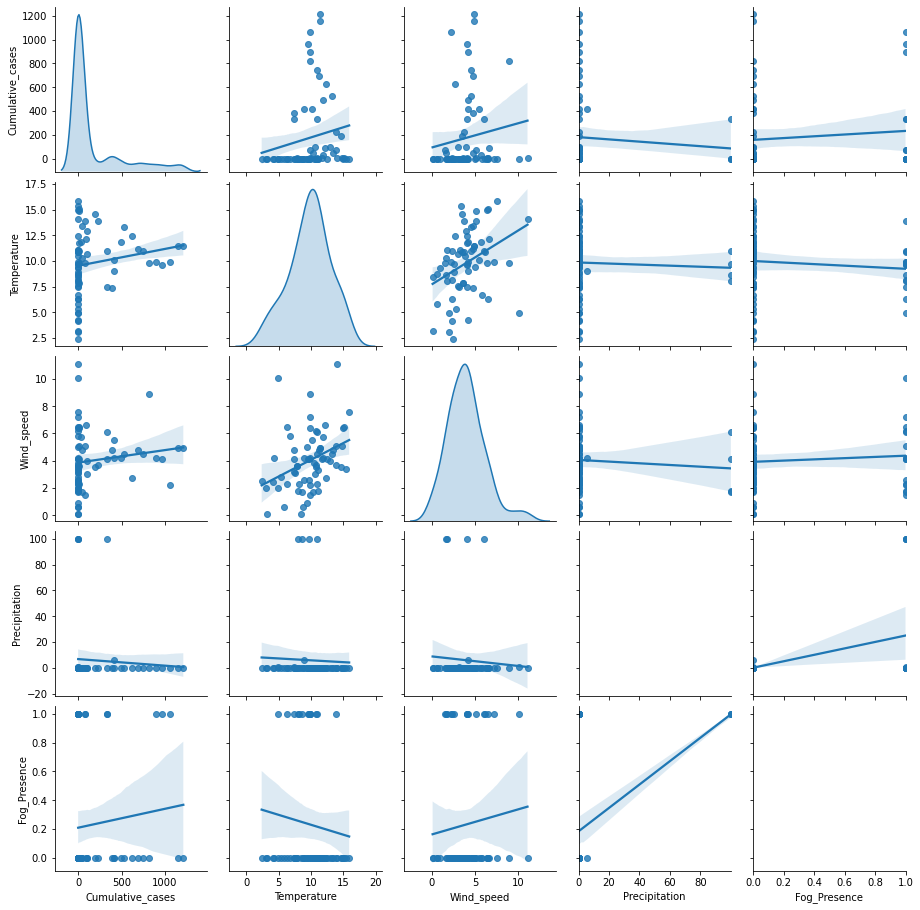

In [13]:
sns.pairplot(df, diag_kind="kde", kind="reg", vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])

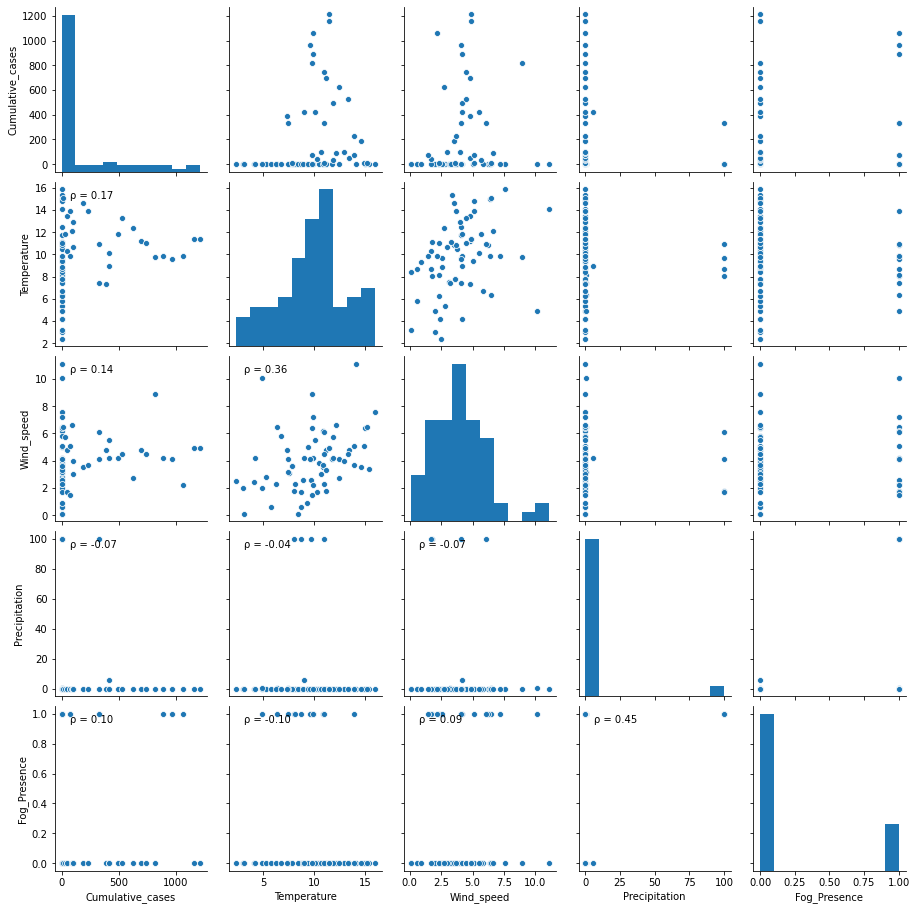

In [14]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(df, vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])
g.map_lower(corrfunc)
plt.show()

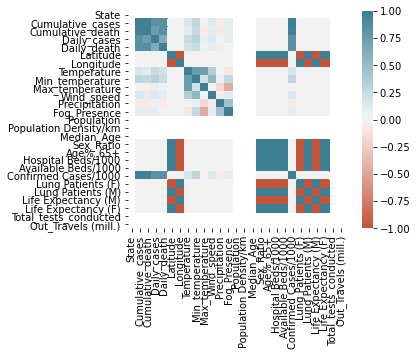

In [15]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

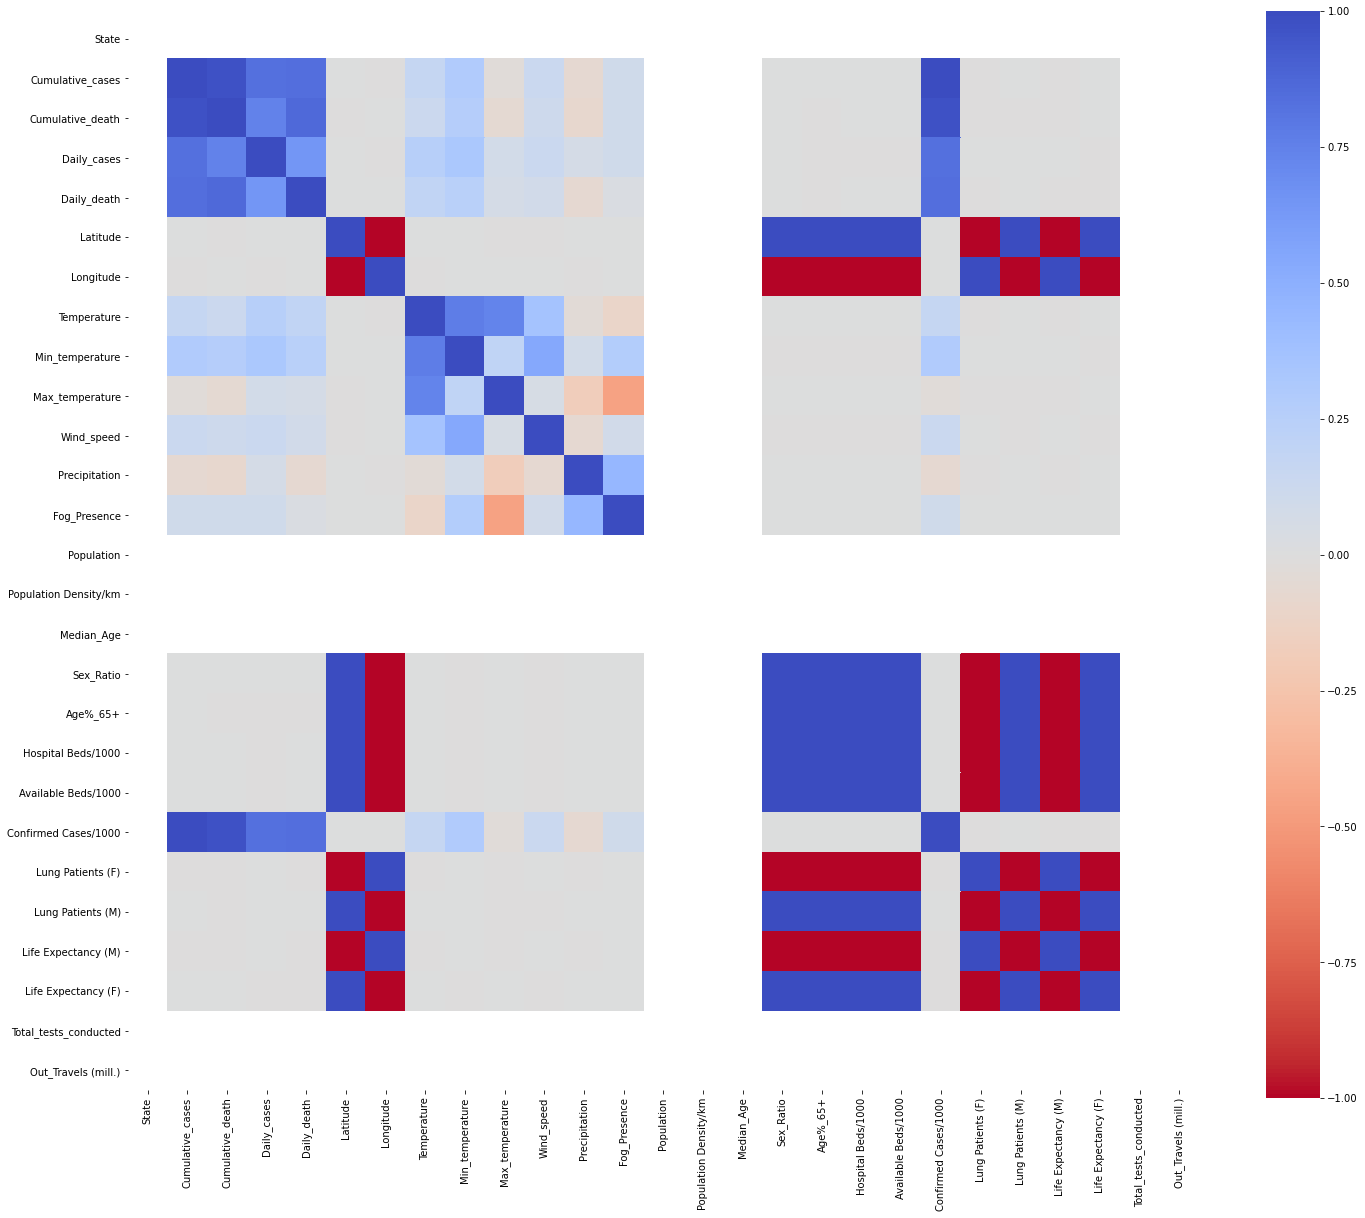

In [16]:
# calculate the correlation matrix
corr = df.corr()
f, ax2 = plt.subplots(1, figsize=(24,20))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2,
        square=True)